In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

# Задание 1

In [2]:
!wget https://courses.openedu.ru/assets/courseware/v1/89b56add1bf7a894d91790c47992ed86/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/chaffinch-1420407_1280.jpg

--2023-09-12 10:21:29--  https://courses.openedu.ru/assets/courseware/v1/89b56add1bf7a894d91790c47992ed86/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/chaffinch-1420407_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194520 (190K) [image/jpeg]
Saving to: ‘chaffinch-1420407_1280.jpg’

chaffinch-1420407_1 100%[===================>] 189.96K   453KB/s    in 0.4s    

2023-09-12 10:21:31 (453 KB/s) - ‘chaffinch-1420407_1280.jpg’ saved [194520/194520]



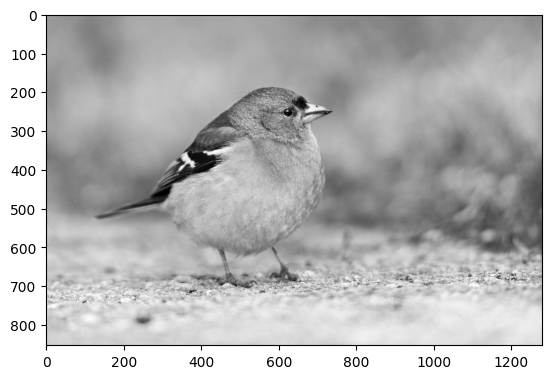

In [40]:
image_name = 'chaffinch-1420407_1280.jpg'

img = cv2.imread(image_name)
GR_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(GR_img, cmap = 'gray')

In [41]:
f = np.fft.fft2(GR_img)
f[84, 1250]

(13282.50020492501-14964.995707963917j)

In [42]:
(img.shape[:2])

(853, 1280)

In [43]:
np.floor((np.array((img.shape[:2]))/2)).astype(int)

array([426, 640])

True


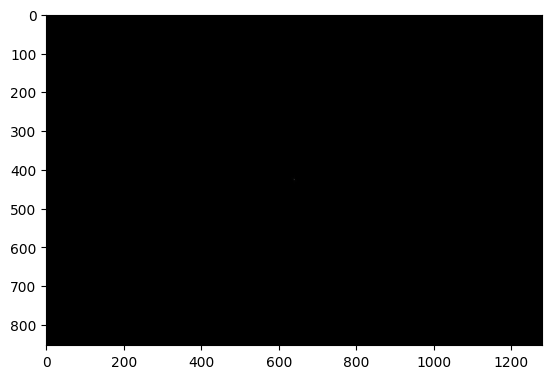

In [44]:
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

print(fshift[426, 640] == f[0][0])

In [45]:
print(max(magnitude_spectrum.ravel()))
print(min(magnitude_spectrum.ravel()))

184179550.0
3.465549387440774


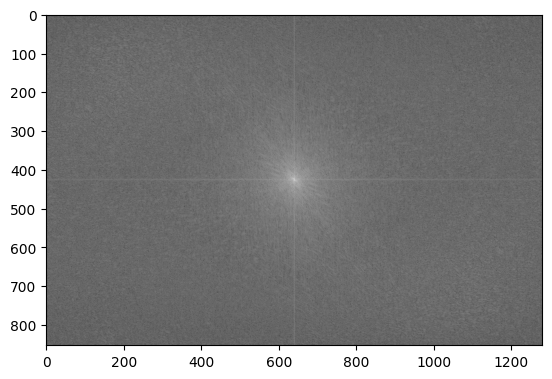

In [46]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [47]:
print(max(magnitude_spectrum.ravel())-min(magnitude_spectrum.ravel()))

17.53502941056285


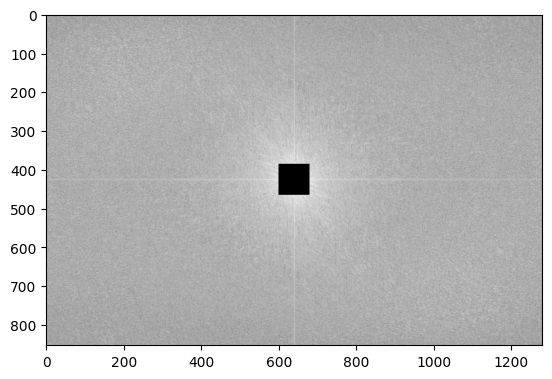

In [49]:
fshift[426 -  40 : 426 + 40, 640-40 : 640 + 40] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

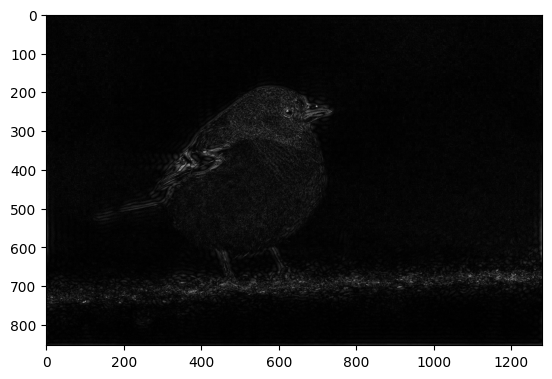

In [50]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

In [51]:
img_back[639, 443]

3.510159270148769

чото веселое

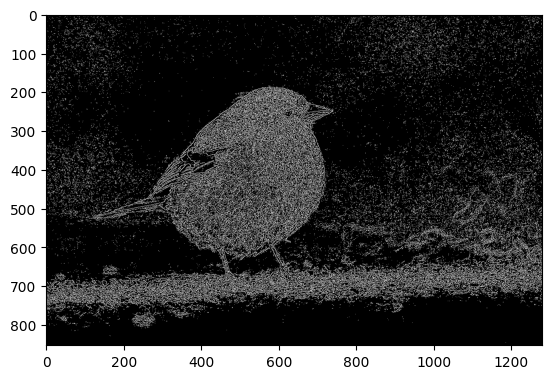

In [55]:
canny = cv2.Canny(GR_img, 50, 50)
plt.imshow(canny, cmap = 'gray')

# Задание 2

In [56]:
!wget https://courses.openedu.ru/assets/courseware/v1/9fe198b199a9a6842c061afd7720e3b5/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/waterscape-5541692_1280.jpg

--2023-09-12 11:05:03--  https://courses.openedu.ru/assets/courseware/v1/9fe198b199a9a6842c061afd7720e3b5/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/waterscape-5541692_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86165 (84K) [image/jpeg]
Saving to: ‘waterscape-5541692_1280.jpg’

waterscape-5541692_ 100%[===================>]  84.15K   318KB/s    in 0.3s    

2023-09-12 11:05:04 (318 KB/s) - ‘waterscape-5541692_1280.jpg’ saved [86165/86165]



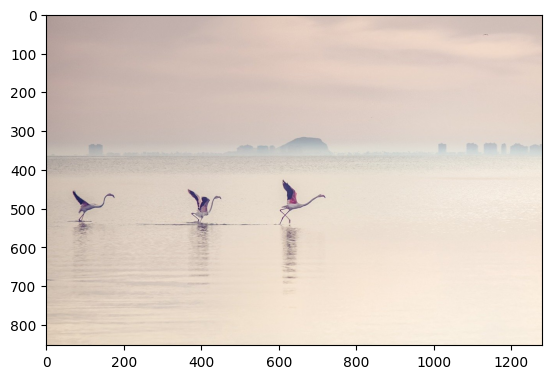

In [64]:
image_name = 'waterscape-5541692_1280.jpg'

img = cv2.imread(image_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

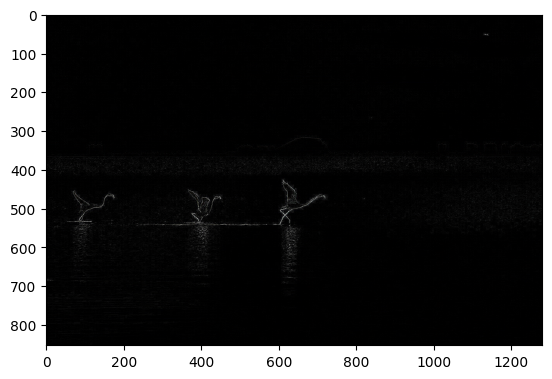

In [67]:
laplacian = cv2.Laplacian(RGB_img, -1)
plt.imshow(laplacian)

In [66]:
sum(laplacian.ravel())

7553489

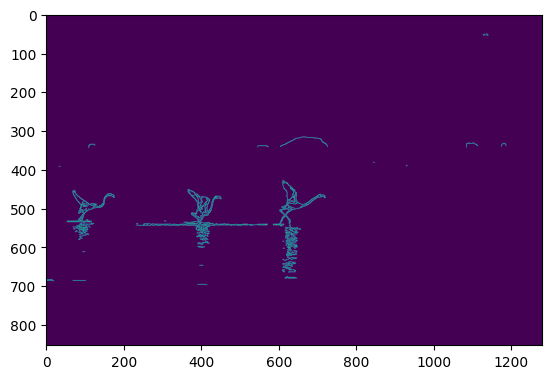

In [68]:
canny = cv2.Canny(RGB_img, 100, 200)
plt.imshow(canny)

In [69]:
sum(canny.ravel())

1429020